<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import random

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

In [11]:
for _ in range(4):
    np.random.seed(121) #랜덤 발생을 위한 씨앗 값 설정
    for _ in range(10):
        print(np.random.randint(1,10),end=' ')
    print()

3 6 9 5 2 5 4 1 3 5 
3 6 9 5 2 5 4 1 3 5 
3 6 9 5 2 5 4 1 3 5 
3 6 9 5 2 5 4 1 3 5 


In [13]:
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [15]:
u,sigma,vt = svd(a)
print(a.shape,' -> ',u.shape,sigma.shape,vt.shape)

(4, 4)  ->  (4, 4) (4,) (4, 4)


In [21]:
sm = np.diag(sigma)
print(np.round(sm,3))

[[3.423 0.    0.    0.   ]
 [0.    2.023 0.    0.   ]
 [0.    0.    0.463 0.   ]
 [0.    0.    0.    0.079]]


In [19]:
a_ = np.dot(np.dot(u,sm),vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [22]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [24]:
iris = load_iris()
data = iris.data
label = iris.target
tsvd = TruncatedSVD(n_components=2)
tsvd_data = tsvd.fit_transform(data)

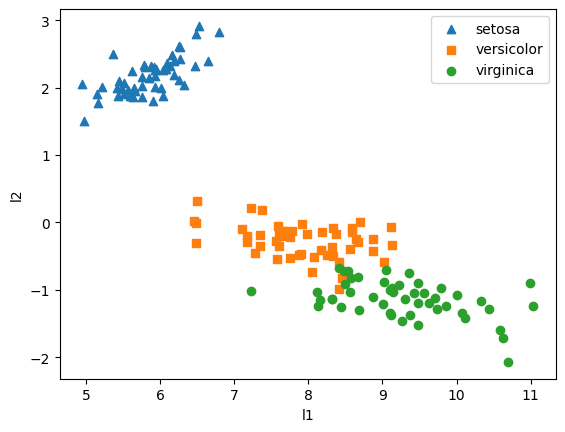

In [25]:
df = pd.DataFrame(tsvd_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
  f_i = df['label']==i #품종별로 필터링
  df_i = df[f_i] #특정 품종만 추출
  x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
  y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
  plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [28]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc,tsvd_data,label,scoring='accuracy',cv=5)
print("정확도:",s)
print("평균:",s.mean())

정확도: [1.         0.96666667 0.96666667 0.96666667 1.        ]
평균: 0.9800000000000001


In [29]:
from sklearn.decomposition import PCA

In [33]:
ss = StandardScaler()
sd = ss.fit_transform(data)
tsvd = TruncatedSVD(n_components=2)
tsvd_data = tsvd.fit_transform(sd)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sd)

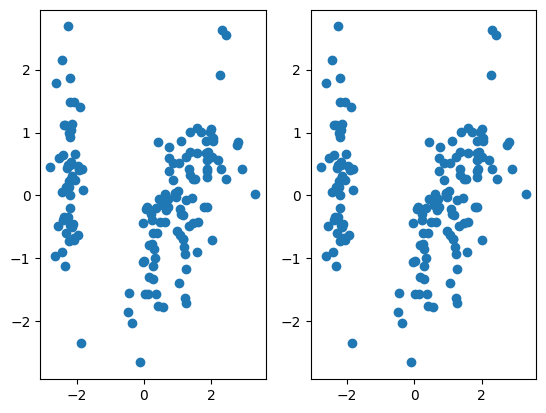

In [34]:
_,axes = plt.subplots(ncols=2)

df1 = pd.DataFrame(tsvd_data,columns=['l1','l2'])
x_data = df1['l1'] #p1 컬럼을 x 데이터로 설정
y_data = df1['l2'] #p2 컬럼을 y 데이터로 설정
axes[0].scatter(x_data,y_data,marker='o')

df2 = pd.DataFrame(pca_data,columns=['l1','l2'])
x_data = df2['l1'] #p1 컬럼을 x 데이터로 설정
y_data = df2['l2'] #p2 컬럼을 y 데이터로 설정
axes[1].scatter(x_data,y_data,marker='o')

plt.show()